In [1]:
import numpy as np
import matplotlib.pyplot as plt
v_jet_vals = [300, 500, 1000]
gamma = 1.6
eta = np.logspace(-2, 2, 1000, base=10)

def calc_v_bs(eta, vjet):
    v_bs = v_jet/(1+(eta**-0.5))
    return v_bs 


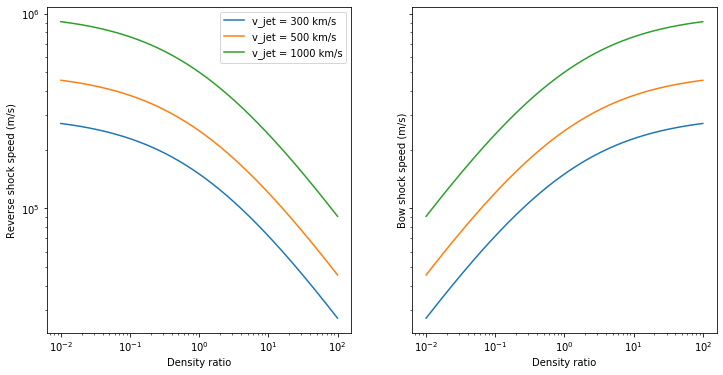

In [2]:
import numpy as np
import matplotlib.pyplot as plt
v_jet_vals = [300, 500, 1000]
eta = np.logspace(-2, 2, 1000, base=10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize = (12, 6))
for v_jet in v_jet_vals:
    v_bs = calc_v_bs(eta, v_jet)*1e3
    v_rs = v_jet*1e3 - v_bs
    ax1.plot(eta, v_rs, label="v_jet = {} km/s".format(str(v_jet)))
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(eta, v_bs, label="v_jet = {} km/s".format(str(v_jet)))
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
ax1.legend()
ax1.set_ylabel("Reverse shock speed (m/s)")
ax1.set_xlabel("Density ratio")
ax2.set_ylabel("Bow shock speed (m/s)")
ax2.set_xlabel("Density ratio")

plt.show()

## Mach number

Assuming $c_s = 20$km/s

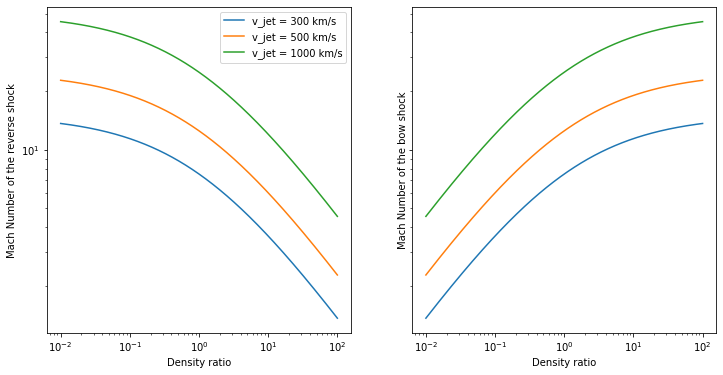

In [3]:
import numpy as np
import matplotlib.pyplot as plt
v_jet_vals = [300, 500, 1000]
eta = np.logspace(-2, 2, 1000, base=10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize = (12, 6))
for v_jet in v_jet_vals:
    v_bs = calc_v_bs(eta, v_jet)
    v_rs = v_jet - v_bs
    M_rs = v_rs/20
    M_bs = v_bs/20
    ax1.plot(eta, M_rs, label="v_jet = {} km/s".format(str(v_jet)))
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(eta, M_bs, label="v_jet = {} km/s".format(str(v_jet)))
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
ax1.legend()
ax1.set_ylabel("Mach Number of the reverse shock")
ax1.set_xlabel("Density ratio")
ax2.set_ylabel("Mach Number of the bow shock")
ax2.set_xlabel("Density ratio")

plt.show()

Assumming the $c_s = \sqrt{\gamma \frac{P}{\rho}} \approx 13$ km/s for the Nova and 4-40km/s for the YSO.

## Reynolds number

Using the viscosity values calculated as $10^-3$ Pa*s for the Nova and the vakue of $3*10^-5$ Pa*s for the YSO.

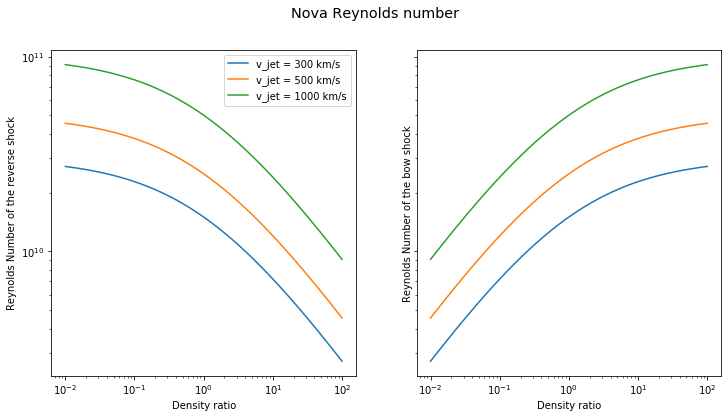

In [6]:
nova_viscosity = 10**-3
nova_density = 10**-8
nova_size = 10**10 
yso_viscosity = 3*10**-5
yso_density = 10**-20
yso_size = 10**15
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize = (12, 6))
for v_jet in v_jet_vals:
    v_bs = calc_v_bs(eta, v_jet)
    v_rs = v_jet - v_bs
    Re_rs = v_rs*10**3*nova_density*nova_size/nova_viscosity
    Re_bs = v_bs*10**3*nova_density*nova_size/nova_viscosity
    ax1.plot(eta, Re_rs, label="v_jet = {} km/s".format(str(v_jet)))
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(eta, Re_bs, label="v_jet = {} km/s".format(str(v_jet)))
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
ax1.legend()
ax1.set_ylabel("Reynolds Number of the reverse shock")
ax1.set_xlabel("Density ratio")
ax2.set_ylabel("Reynolds Number of the bow shock")
ax2.set_xlabel("Density ratio")

st = fig.suptitle("Nova Reynolds number", fontsize="x-large")
plt.show()


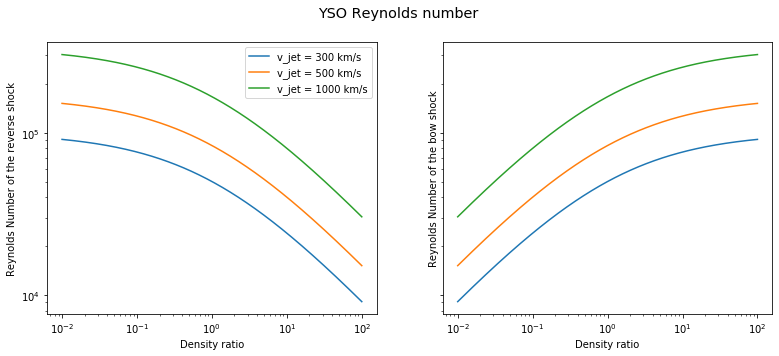

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize = (13, 5))
for v_jet in v_jet_vals:
    v_bs = calc_v_bs(eta, v_jet)
    v_rs = v_jet - v_bs
    Re_rs = v_rs*10**3*yso_density*yso_size/yso_viscosity
    Re_bs = v_bs*10**3*yso_density*yso_size/yso_viscosity
    ax1.plot(eta, Re_rs, label="v_jet = {} km/s".format(str(v_jet)))
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(eta, Re_bs, label="v_jet = {} km/s".format(str(v_jet)))
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
ax1.legend()
ax1.set_ylabel("Reynolds Number of the reverse shock")
ax1.set_xlabel("Density ratio")
ax2.set_ylabel("Reynolds Number of the bow shock")
ax2.set_xlabel("Density ratio")

st = fig.suptitle("YSO Reynolds number", fontsize="x-large")
plt.show()

## Cooling time ratio

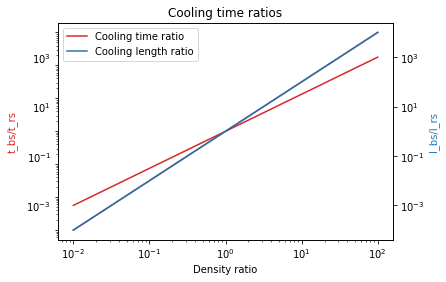

In [8]:
ctime = eta**(3/2)
c_length = eta**2
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Density ratio")
ax1.set_ylabel("t_bs/t_rs", color = color)
ax1.yaxis.labelpad = 40
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.plot(eta, ctime, label="Cooling time ratio", color=color)
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    labelleft=False) # labels along the bottom edge are off
ax2 = ax1.twinx()
ax2.plot(eta, ctime, label="Cooling time ratio", color=color)
color = 'tab:blue'

ax2.set_yscale("log")

ax2.set_ylabel("l_bs/l_rs", color=color)

ax2.plot(eta, c_length, label="Cooling length ratio", color= color)

ax2.tick_params(axis="y", labelright=True, labelleft=True, which="both")

plt.title("Cooling time ratios")
plt.legend()
plt.show()

## Cooling time at $\eta = 10$

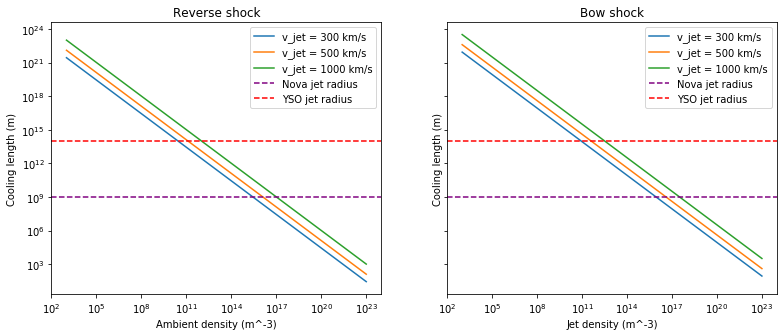

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize = (13, 5))
n_a = np.logspace(3, 23, 100, base=10.0)
for v_jet in v_jet_vals:
    v_rs = v_jet-calc_v_bs(10, v_jet)
    cooling_length_rs = 9*(v_rs*1e3)**3*0.62*1.67e-27/(64*n_a*2e-40*10**2)
    ax1.plot(n_a, cooling_length_rs, label="v_jet = {} km/s".format(str(v_jet)))
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    cooling_length_fs = 9*(calc_v_bs(10, v_jet)*1e3)**3*0.62*1.67e-27/(64*n_a*10*2e-40*10**2)
    ax2.plot(n_a, cooling_length_fs, label="v_jet = {} km/s".format(str(v_jet)))
    ax2.set_xscale("log")
    ax2.set_yscale("log")
ax1.set_ylabel("Cooling length (m)")
ax1.axhline(y=1e9, color="purple", linestyle='--', label="Nova jet radius")
ax1.axhline(y=1e14, color="red", linestyle='--', label="YSO jet radius")
ax2.axhline(y=1e9, color="purple", linestyle='--', label="Nova jet radius")
ax2.axhline(y=1e14, color="red", linestyle='--', label="YSO jet radius")
ax1.set_title("Reverse shock")
ax1.set_xlabel("Ambient density (m^-3)")
ax2.set_ylabel("Cooling length (m)")
ax2.set_title("Bow shock")
ax2.set_xlabel("Jet density (m^-3)")
ax1.legend()
plt.legend()
plt.show()

With density fixed at $n_a = 10^-3$cm^-3

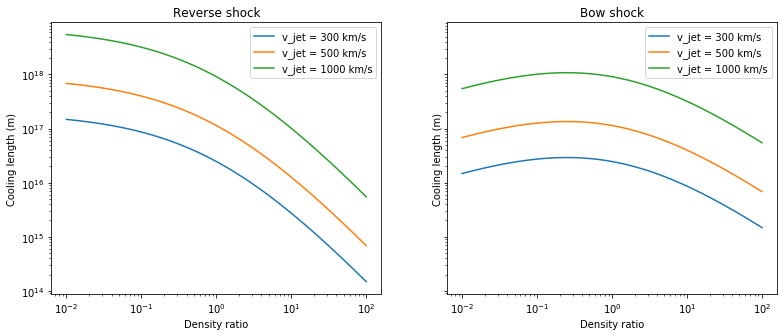

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize = (13, 5))
n_a = 1e9
eta = np.logspace(-2, 2, 1000, base=10)
for v_jet in v_jet_vals:
    v_rs = v_jet-calc_v_bs(eta, v_jet)
    cooling_length_rs = 9*(v_rs*1e3)**3*0.62*1.67e-27/(64*n_a*2e-40*10**2)
    ax1.plot(eta, cooling_length_rs, label="v_jet = {} km/s".format(str(v_jet)))
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    cooling_length_fs = 9*(calc_v_bs(eta, v_jet)*1e3)**3*0.62*1.67e-27/(64*n_a*eta*2e-40*10**2)
    ax2.plot(eta, cooling_length_fs, label="v_jet = {} km/s".format(str(v_jet)))
    ax2.set_xscale("log")
    ax2.set_yscale("log")

ax1.set_ylabel("Cooling length (m)")
ax1.set_xlabel("Density ratio")
ax1.set_title("Reverse shock")
ax2.set_ylabel("Cooling length (m)")
ax2.set_xlabel("Density ratio")
ax2.set_title("Bow shock")
ax1.legend()
ax2.legend()
plt.show()

## RT time